In [1]:
from fastai.vision.all import *

## Data setup

In [5]:
def mask_file_from_image_file(image_file):
    data_dir = image_file.parent.parent
    mask_name = image_file.with_suffix('.png').name
    return data_dir / 'masks' / mask_name

In [6]:
data_dir = Path.home() / 'data/solar-panel'

In [7]:
image_files = get_image_files(data_dir/'images')
mask_files = get_image_files(data_dir/'masks')

In [29]:
splits = RandomSplitter()(image_files)

image_pipeline = [PILImage.create]
mask_pipeline = [mask_file_from_image_file, PILMask.create]

ds = Datasets(image_files, [image_pipeline, mask_pipeline], splits=splits)

<AxesSubplot:>

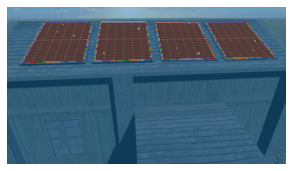

In [30]:
ds.show(ds[29])

## Transforms setup

In [43]:
after_item = [ToTensor(), Resize(360, 360)]
after_batch = [IntToFloatTensor(), *aug_transforms(max_lighting=0.0, max_zoom=1.1)]

dls = ds.dataloaders(bs=64, after_item=after_item, after_batch=after_batch)

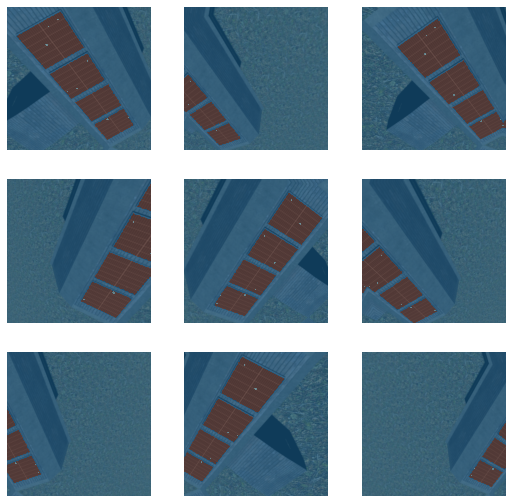

In [45]:
dls.show_batch(unique=True)

## Model setup

In [49]:
metrics = [foreground_acc, DiceMulti]
learn = unet_learner(dls, resnet18, n_out=3, metrics=metrics)

In [50]:
learn.model

DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05